In [31]:
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt

In [32]:
numX = 100
numP = 200

x = np.linspace(0, 1, numX)
powers = np.arange(0, numP)
coeffs = np.ones_like(powers)*1e10
coeffs[coeffs % 2 == 0] = coeffs[coeffs % 2 == 0] * -1
# Convert coefficients to mpmath high precision
coeffs_mpmath = mp.matrix(coeffs)
pow_x_normal = x**powers[:, None]
print(pow_x_normal.shape)
for i in range(numP):
    pow_x_normal[i] = coeffs[i]*pow_x_normal[i]
print(pow_x_normal.shape)

(200, 100)
(200, 100)


In [33]:
pow_x_mpmath = np.zeros_like(pow_x_normal)
mp.mp.dps = 200
for i, power in enumerate(powers):
    for j, x_val in enumerate(x):
        pow_x_mpmath[i, j] = mp.power(x_val, power)
# Multiply each row by the corresponding coefficient for high precision
for i in range(numP):
    pow_x_mpmath[i] = [mp.fmul(coeffs_mpmath[i], val) for val in pow_x_mpmath[i]]

print(pow_x_mpmath.shape)

(200, 100)


In [43]:
pow_x_mpmath = mp.matrix(pow_x_mpmath)
pow_x_normal = mp.matrix(pow_x_normal)
error= pow_x_mpmath-pow_x_normal
print(error)
# plt.contourf(error)
# plt.colorbar()
# plt.figure()
# plt.contourf(pow_x_normal)
# plt.colorbar()

[0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                                                                                                                                                                                                              0.0                                                                                                                                                                                                              0.0  0.0  0.0  0.0  0.0                                                                                                                                                                                                              0.0  0.0  0.0  0.0  0.0  0.0                                                                                                                                                                                                           0.0  0.0                                                

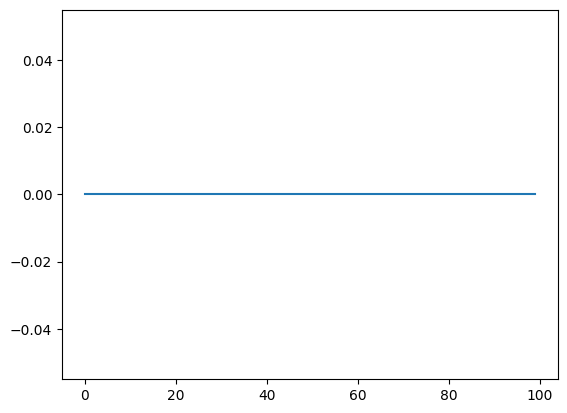

In [65]:
error = np.sqrt((pow_x_mpmath - pow_x_normal)**2).sum(axis=0)
plt.plot(error)